# Amazon Fine Food Reviews Analysis
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews
The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).
<img src="https://i1.wp.com/www.jerseygirltalk.com/wp-content/uploads/2017/10/Amazon-Fresh.png?resize=560%2C315">

In [1]:
!pip install pydrive
!pip install gensim
!pip install nltk
!pip install seaborn
!pip install xgboost
!wget --header='Host: doc-14-34-docs.googleusercontent.com' --header='User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' --header='Accept-Language: en-US,en;q=0.9' --header='Cookie: AUTH_sl8scr3r78dtlbjs5mvoco4ilf6h1a3b=09929041593969215305|1531468800000|u59ib6rmr97ctn3dvalen1hqiaup4fhq; NID=130=LXZwJ_B1s7OlagMooX3o0cdKaSHL3frN5ha4lIftM8TuGzoTCmfcWXpJ3cNRIcbkyUPqb3Jy-XQmP9UHSogzUlrWBiowlnwfwg3Cx-F6T5acQOD-gO27Uk1dFzgik3yZ' --header='Connection: keep-alive' 'https://doc-14-34-docs.googleusercontent.com/docs/securesc/sr3ne958tilodvhhec79bitjd2u2bnlr/t4ul11orpkbo7g1j7a551rv07qf911pf/1531468800000/09929041593969215305/09929041593969215305/1cZS7OUXVft4KTZ1AzZPu95hSgWzu3aC8?e=download' -O 'final.sqlite' -c

    100% |################################| 993kB 12.2MB/s ta 0:00:01
    100% |################################| 61kB 22.6MB/s ta 0:00:01
    100% |################################| 102kB 1.3MB/s a 0:00:01
    100% |################################| 276kB 18.7MB/s ta 0:00:01
    100% |################################| 225kB 19.5MB/s ta 0:00:01
    100% |################################| 71kB 26.9MB/s ta 0:00:01
    100% |################################| 51kB 23.1MB/s ta 0:00:01
    100% |################################| 81kB 31.1MB/s ta 0:00:01
    100% |################################| 71kB 27.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydrive ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
  Running setup.py bdist_wheel for PyYAML ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/ad/da/0c/74eb680767247273e2cf2723482cb9c924fe70af57c334513f
  Running setup.py bdist_wheel for httplib2 ..

  Running setup.py bdist_wheel for gensim ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/26/7b/c6/8f29903415a88fc8c9fb99c6c027684d5ce7e6da98cf71a5b9
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built gensim smart-open bz2file
    100% |################################| 1.4MB 8.6MB/s eta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk
    100% |################################| 583kB 10.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/7d/45/ff/92c864d34ae8e

In [63]:
!pip install --upgrade "ipython[all]"

Requirement already up-to-date: ipython[all] in /opt/conda/envs/py3.6/lib/python3.6/site-packages (6.4.0)
Requirement not upgraded as not directly required: decorator in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (4.3.0)
Requirement not upgraded as not directly required: simplegeneric>0.8 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.8.1)
Requirement not upgraded as not directly required: backcall in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.1.0)
Requirement not upgraded as not directly required: pygments in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (2.2.0)
Requirement not upgraded as not directly required: pickleshare in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.7.4)
Requirement not upgraded as not directly required: setuptools>=18.5 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (36.4.0)
Requirement not upgraded a

In [2]:
# loading libraries and data

%matplotlib inline

import sqlite3                          # for sql database
import pandas as pd
import numpy as np
import nltk                             # nltk:- Natural Language Processing Toolkit
import string
import re
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import pickle
def saveindisk(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"), protocol=4)
def openfromdisk(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

con = sqlite3.connect("final.sqlite")

# Filtering only positive and negative reviews that is
# not taking into consideration those reviews with score = 3
df = pd.read_sql_query("""
SELECT *
FROM Reviews
""", con)

In [3]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedText_NoStem
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,b'bought sever vital can dog food product foun...,b'bought several vitality canned dog food prod...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...,b'product arrived labeled jumbo salted peanuts...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,b'confect around centuri light pillowi citrus ...,b'confection around centuries light pillowy ci...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,b'look secret ingredi robitussin believ found ...,b'looking secret ingredient robitussin believe...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,b'great taffi great price wide assort yummi ta...,b'great taffy great price wide assortment yumm...


In [4]:
df.describe()

,index,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time
count,364171.000000,364171.000000,364171.000000,364171.000000,3.641710e+05
mean,241825.377603,261814.561014,1.739021,2.186841,1.296135e+09
std,154519.869452,166958.768333,6.723921,7.348482,4.864772e+07
min,0.000000,1.000000,0.000000,0.000000,9.393408e+08
25%,104427.500000,113379.500000,0.000000,0.000000,1.270858e+09
50%,230033.000000,249445.000000,0.000000,1.000000,1.311379e+09
75%,376763.500000,407408.500000,2.000000,2.000000,1.332893e+09
max,525813.000000,568454.000000,866.000000,878.000000,1.351210e+09


In [5]:
df.shape

(364171, 13)

In [6]:
df['Score'].size

364171

In [7]:
# Taking Sample Datapoints
n_samples = 15000
df_sample = df.sample(n_samples)
df_sample.sort_values('Time', inplace=True) #Sorting with respect to time
df_sample.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedText_NoStem
169258,212449,230260,B00004RYGX,A2HIZRVOKXKZ52,KAY N. FOWLER,0,0,Positive,1012780800,Beetlejuice - Great Fun for Everyone!,When vacationing Adam and Barbara Maitland mee...,b'vacat adam barbara maitland meet demis kill ...,b'vacationing adam barbara maitland meet demis...
117909,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,Positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...,b'book poetry months year goes month cute litt...
316048,443664,479725,B00005U2FA,A270SG4UVKEO3X,"Susanna ""suzattorney""",23,23,Positive,1041638400,Easier to Use than Standard Vacu Vin,I have used both this product and the standard...,b'use product standard cheaper pay premium buy...,b'used product standard cheaper pay premium bu...
166583,208479,225941,B000PKFZH8,A375QRG43POEW6,dndnd,23,25,Negative,1069977600,Stay Away...,This product ships in great packaging and it l...,b'product ship great packag look good tast hor...,b'product ships great packaging looks good tas...
262407,359912,389289,B0000DYZCG,A1U4PHVIQPBCD2,Dan Murphy,2,4,Positive,1071187200,Excellent quality and service!,I received this as a gift. Great quality and o...,b'receiv gift great qualiti deliveri bunch clu...,b'received gift great quality delivery bunch c...


In [8]:
def polarity(x):
    if x == "Positive":
        return 0
    else:
        return 1
df_sample['Score'] = df_sample['Score'].map(polarity)

# Applying the Random Forest and GBDT on the different Vectorizing Techniques


## Bag of Word(BOW)

### Random Forest
<img src="https://laurakahn.files.wordpress.com/2018/03/random-forest.png?w=775">

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit


In [10]:
X_sample, _, y_sample, _  = train_test_split(df_sample['CleanedText'], df_sample['Score'], train_size=0.05)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
bi_gram = CountVectorizer(ngram_range=(1, 2))
X_train = bi_gram.fit_transform(X_train)

# Normalization means bringing orignal values in the range of 0 to 1.
X_train = preprocessing.normalize(X_train)

#Normalize
X_test = bi_gram.transform(X_test)
X_test = preprocessing.normalize(X_test)

In [12]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.824468085106


In [13]:
# Optimal Hyperparameter

clf = RandomForestClassifier()
# params we need to try on classifier
param_grid = {
    'n_estimators': [5, 10, 50, 100]
}
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 5}
Best Accuracy: 88.04%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    6.5s finished


In [14]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.82      1.00      0.90       155
          1       0.00      0.00      0.00        33

avg / total       0.68      0.82      0.75       188



/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


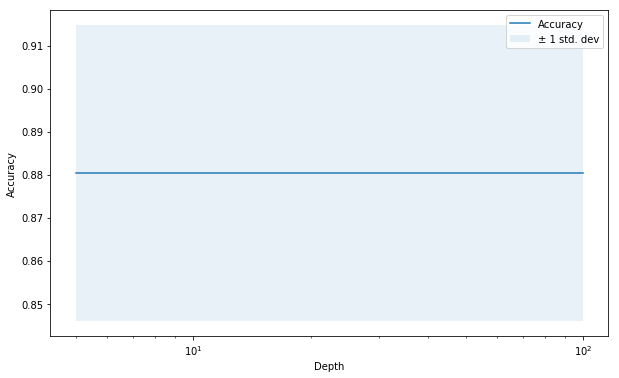

In [15]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_score, label='Accuracy')
plt.fill_between(param_grid['n_estimators'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

## GBDT

In [16]:
X_sample, _, y_sample, _ = train_test_split(df_sample['CleanedText'], df_sample['Score'], train_size=0.05)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
bi_gram = CountVectorizer(ngram_range=(1, 2))
X_train = bi_gram.fit_transform(X_train)

# Normalization means bringing orignal values in the range of 0 to 1.
X_train = preprocessing.normalize(X_train)

#Normalize
X_test = bi_gram.transform(X_test)
X_test = preprocessing.normalize(X_test)

In [18]:
!pip

Accuracy: 0.877659574468


In [19]:
# Optimal Hyperparameter

clf = XGBClassifier()
# params we need to try on classifier
param_grid = {
    'n_estimators': [5, 10, 50, 100]
}
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 5}
Best Accuracy: 86.86%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.5s finished


In [20]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.89      0.95      0.92       165
          1       0.33      0.17      0.23        23

avg / total       0.82      0.86      0.84       188



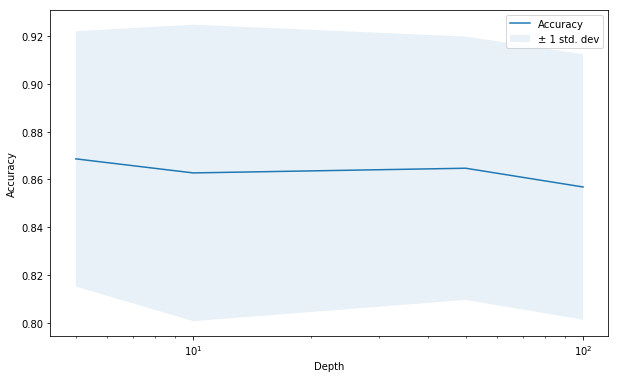

In [21]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_score, label='Accuracy')
plt.fill_between(param_grid['n_estimators'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

# Tf-Idf Features

### Random Forest

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

In [23]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train = tfidf.fit_transform(X_train)

X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = tfidf.transform(X_test)

X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (562, 21535)
Test Data Size:  (188, 21535)


In [24]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.877659574468


In [25]:
clf = RandomForestClassifier()
#params we need to try on classifier
param_grid = {
    'n_estimators': [5, 10, 50, 100]
}
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 10}
Best Accuracy: 85.10%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.5s finished


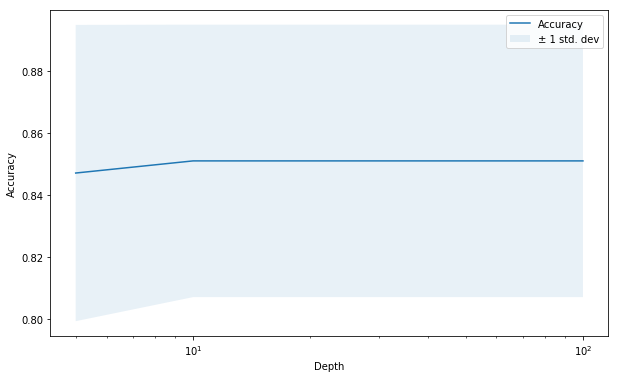

In [26]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_score, label='Accuracy')
plt.fill_between(param_grid['n_estimators'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

## GBDT

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

In [28]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train = tfidf.fit_transform(X_train)

X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = tfidf.transform(X_test)

X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (562, 21861)
Test Data Size:  (188, 21861)


In [29]:
clf = XGBClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.867021276596


In [30]:
# Optimal Hyperparameter

clf = XGBClassifier()
# params we need to try on classifier
param_grid = {
    'n_estimators': [5, 10, 50, 100]
}
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 10}
Best Accuracy: 85.88%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   10.0s finished


In [31]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.87      0.99      0.93       162
          1       0.67      0.08      0.14        26

avg / total       0.84      0.87      0.82       188



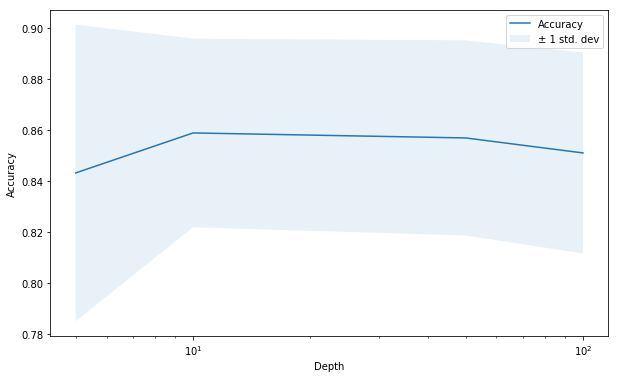

In [32]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_score, label='Accuracy')
plt.fill_between(param_grid['n_estimators'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

# Avg Word2Vec

In [33]:
list_corpus = df_sample["Text"].tolist()
list_labels = df_sample["Score"].tolist()

In [34]:
from gensim.models import KeyedVectors
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
w2v_model_google = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

--2018-07-19 02:28:36--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.100.189
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.100.189|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [35]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['CleanedText'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [36]:
embeddings = get_word2vec_embeddings(w2v_model_google, df_sample)
X_sample, _, y_sample, _ = train_test_split(embeddings, list_labels, train_size=0.05)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
# Train model with default hyperparameter
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.856382978723


In [38]:
# Train model with default hyperparameter
# Using Grid search

param_grid = {
    'n_estimators': [5, 10, 50, 100]
}

clf = RandomForestClassifier()

tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 5}
Best Accuracy: 84.12%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.1s finished


In [39]:
from sklearn.metrics import classification_report
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.best_estimator_.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.86      1.00      0.92       161
          1       0.00      0.00      0.00        27

avg / total       0.73      0.86      0.79       188



/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


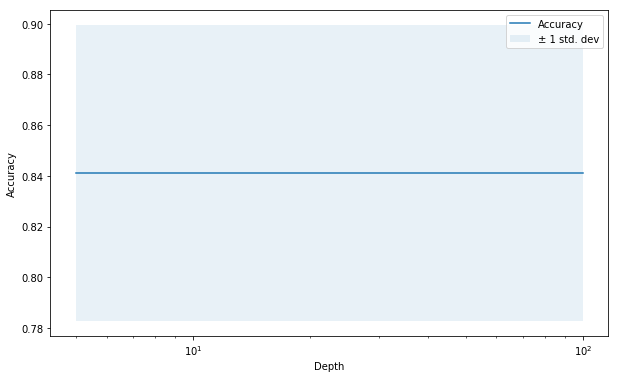

In [40]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_score, label='Accuracy')
plt.fill_between(param_grid['n_estimators'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

## GBDT

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

In [42]:
clf = XGBClassifier(n_jobs=-1)
X_train = np.array(X_train)
y_train = np.array(y_train)
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.845744680851


In [43]:
# Optimal Hyperparameter

clf = XGBClassifier()
# params we need to try on classifier
param_grid = {
    'n_estimators': [5, 10, 50, 100]
}
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 5}
Best Accuracy: 83.53%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.0s finished


In [44]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.85      1.00      0.92       159
          1       0.00      0.00      0.00        29

avg / total       0.72      0.85      0.78       188



/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


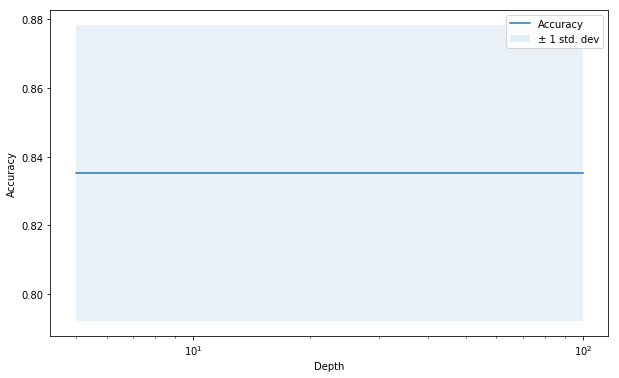

In [45]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_score, label='Accuracy')
plt.fill_between(param_grid['n_estimators'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

# Tf-IDF Word2vec

## Random Forest

In [46]:
n_samples = 5000
df_sample_new = df_sample.sample(n_samples)
df_sample_new.sort_values('Time',inplace=True) 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2)) # Using bi-grams
tfidf_vec_new = tfidf.fit_transform(df_sample_new['CleanedText_NoStem'].values)
print(tfidf_vec_new.shape)
features = tfidf.get_feature_names()

(5000, 150594)


In [47]:
tfidf_w2v_vec_google = []
review = 0

for sent in df_sample_new['CleanedText_NoStem'].values:
    cnt = 0 
    weighted_sum  = 0
    sent_vec = np.zeros(300)
    sent = sent.decode("utf-8") 
    for word in sent.split():
        try:
            wvec = w2v_model_google.wv[word] 
            tfidf_vec = tfidf_vec_new[review,features.index(word)]
            sent_vec += (wvec * tfidf_vec)
            weighted_sum += tfidf_vec
        except:
            pass
    sent_vec /= weighted_sum
    tfidf_w2v_vec_google.append(sent_vec)
    review += 1
tfidf_w2v_vec_google = np.array(tfidf_w2v_vec_google)
saveindisk(tfidf_w2v_vec_google,"tfidf_w2v_vec_google")

/opt/conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [48]:
tfidf_w2v_vec_google = openfromdisk("tfidf_w2v_vec_google")

In [49]:
tfidfw2v_vecs_norm = preprocessing.normalize(tfidf_w2v_vec_google)

In [50]:
X_sample, _, y_sample, _  = train_test_split(tfidfw2v_vecs_norm, df_sample_new['Score'], train_size=0.05)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [51]:
# Train model with default hyperparameter
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.888888888889


In [52]:
# Train model with default hyperparameter
# Using Grid search

param_grid = {
    'n_estimators': [5, 10, 50, 100]
}

clf = RandomForestClassifier()

tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 10}
Best Accuracy: 82.35%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.5s finished


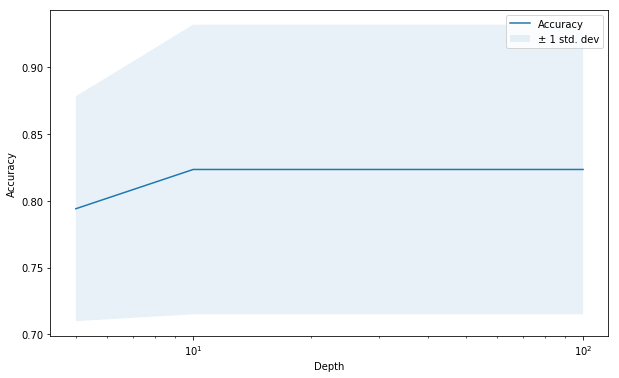

In [53]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_score, label='Accuracy')
plt.fill_between(param_grid['n_estimators'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

## GBDT

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

In [55]:
clf = XGBClassifier(n_jobs=-1)
X_train = np.array(X_train)
y_train = np.array(y_train)
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.809523809524


In [56]:
# Optimal Hyperparameter

clf = XGBClassifier()
# params we need to try on classifier
param_grid = {
    'n_estimators': [5, 10, 50, 100]
}
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.5s finished


Best HyperParameter:  {'n_estimators': 100}
Best Accuracy: 86.47%


In [57]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.82      0.98      0.89        51
          1       0.50      0.08      0.14        12

avg / total       0.76      0.81      0.75        63



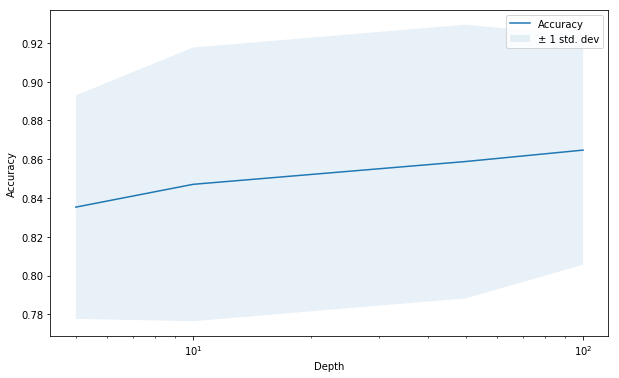

In [58]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_score, label='Accuracy')
plt.fill_between(param_grid['n_estimators'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

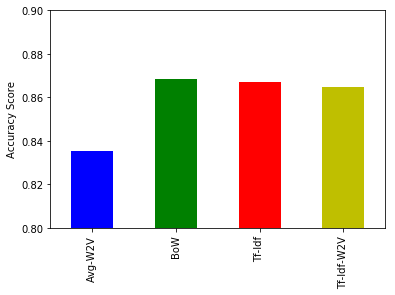

In [61]:
XG_model_accuracy = {
    'BoW': 0.8686,
    'Tf-Idf':0.8688,
    'Avg-W2V': 0.8353,
    'Tf-Idf-W2V': 0.8647
}

pd.Series(XG_model_accuracy).plot(kind='bar', color='bgry')
plt.ylabel('Accuracy Score')
plt.ylim((0.80, 0.90));


<img src="https://image.ibb.co/iZuxyo/XG.png">

## Bagging
* Random Forest is a bagging algorithm. It reduces variance.
* Say that you have very unreliable models, such as Decision Trees.In such a case, you can build a robust model (reduce variance) through bagging. Bagging is when you create different models by resampling your data to make the resulting model more robust.
* Random forest is what we call to bagging applied to decision trees, but it's no different than other bagging algorithm.

## Boosting
* Boosting reduces variance, and also reduces bias. It reduces variance because you are using multiple models (bagging). It reduces bias by training the subsequent model by telling him what errors the previous models made (the boosting part).

* There are two main algorithms:
* Adaboost: this is the original algorithm; you tell subsequent models to punish more heavily observations mistaken by the previous models
* Gradient boosting: you train each subsequent model using the residuals (the difference between the predicted and true values)

# Conclusion:-
* XGBoost and Random Forest on Bi-gram, TF-IDF, AvgWord2vec and TFIDF Word2Vec using depth as 40 as max_depth.
* From the Random forest and XGBoost the best accuracy is given by the XGBoost of about 86.86 and F1-Score about of 0.84 because it uses boosting.
